# 광고 클릭 예측 모델 만들기 의사결정트리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### CART 알고리즘 예시

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
# 1열 ~ 4열의 정보를 알 수 있음
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# 특징행렬 생성
X = iris.data[:, 2:]

In [7]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [8]:
# target의 종류와 빈도수 확인
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [9]:
# 타겟의 정보 확인
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# 대상벡터 생성
y = iris.target

In [11]:
# 디시전 트리 모듈 불러오기
from sklearn.tree import DecisionTreeClassifier

In [12]:
# 트리의 깊이 최대 2
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
# export_graphviz ==>  트리의 시각화를 위한 모듈
from sklearn.tree import export_graphviz

In [14]:
# (model, 파일 확장자, feature_names, class_name(분류이름), rounded(둥근 사각형), filled(중요한 노드 색칠), impurity(지니계수 출력 여부))
export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names[2:],class_names=iris.target_names, rounded=True, filled=True, impurity=True)

In [15]:
import pydot

In [16]:
graph = pydot.graph_from_dot_file("iris.dot")[0]

In [17]:
iris_png = graph.create_png()

In [18]:
from IPython.core.display import Image

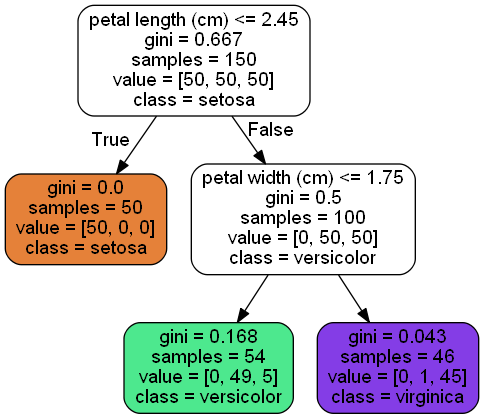

In [19]:
# 의사결정 그림 그리기
Image(iris_png)

In [20]:
# 변수중요도 확인
for feature, importance in zip(iris.feature_names[2:], tree.feature_importances_):
    print('{}: {}'.format(feature,importance))

petal length (cm): 0.5619909502262443
petal width (cm): 0.4380090497737556


### 광고 데이터 준비

In [21]:
# 트레이닝 불러오기(nrows ==> 지정개수만큼 읽기)
train_df = pd.read_csv("C:/Users/Yoo/Documents/Study/Bigdata center/data/advertisement/train.csv", nrows=100000)

In [22]:
unused_columns, label_column = ["id", "hour", "device_id", "device_ip"], "click"

In [23]:
# 미사용 열 제거
train_df = train_df.drop(unused_columns, axis=1)

In [24]:
# 특징행렬 만들기(딕셔너리 형태)
X_dict_train = list(train_df.drop(label_column, axis=1).T.to_dict().values())

In [25]:
X_dict_train[0]

{'C1': 1005,
 'banner_pos': 0,
 'site_id': '1fbe01fe',
 'site_domain': 'f3845767',
 'site_category': '28905ebd',
 'app_id': 'ecad2386',
 'app_domain': '7801e8d9',
 'app_category': '07d7df22',
 'device_model': '44956a24',
 'device_type': 1,
 'device_conn_type': 2,
 'C14': 15706,
 'C15': 320,
 'C16': 50,
 'C17': 1722,
 'C18': 0,
 'C19': 35,
 'C20': -1,
 'C21': 79}

In [26]:
y_train = train_df[label_column]

In [27]:
# 테스트 불러오기(skiprows ==> 이 부분은 읽지 않고 다음부터 읽기)
test_df = pd.read_csv("C:/Users/Yoo/Documents/Study/Bigdata center/data/advertisement/train.csv", header=0, skiprows=(1, 100000), nrows=100000)

In [28]:
# 트레이닝 데이터와 똑같이 처리
test_df = test_df.drop(unused_columns, axis=1)
X_dict_test = list(test_df.drop(label_column, axis=1).T.to_dict().values())
y_test = test_df[label_column]

### 원 핫 인코딩

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [30]:
# sparse ==> 희소행렬 여부(메모리 차이가 매우 큼)
vectorizer = DictVectorizer(sparse=True)

In [31]:
X_train = vectorizer.fit_transform(X_dict_train)

In [32]:
# 19열 -> 4952열로 변환됨
X_train.shape

(100000, 4952)

In [33]:
# toarray ==> 희소행렬 -> 원본행렬
X_train.toarray()[:5]

array([[ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15704.,   320., ...,     0.,     0.,     0.],
       [ 1005., 15706.,   320., ...,     0.,     0.,     0.],
       [ 1005., 18993.,   320., ...,     0.,     0.,     0.]])

In [36]:
# 트레이닝 데이터와 똑같이 처리
X_test = vectorizer.fit_transform(X_dict_test)
X_test.shape

(100000, 4952)

### 그리그 서치를 이용한 트리 모델 학습

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
parameters = {"max_depth": [3, 10, None]}

In [39]:
# criterion(기본 gini)
decision_tree = DecisionTreeClassifier(criterion="gini", min_samples_split=30)

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# cv: 교차확인, scoring: 성능지표
grid_search = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=3, scoring="roc_auc")

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=30,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 10, None]}, pre_dispatch='2*n_jobs',


In [43]:
# 최적의 파라미터 조회
grid_search.best_params_

{'max_depth': 10}

In [44]:
# 최적의 파라미터값 가지고 있는 estimator 개체
decision_tree_best = grid_search.best_estimator_

### 의사결정 트리 모델의 파일 출력

In [47]:
from sklearn.tree import export_graphviz
import pydot

In [46]:
# export_graphviz 설정
export_graphviz(decision_tree_best, out_file="ctr_decision_tree.dot", feature_names=vectorizer.feature_names_,class_names=["0", "1"], rounded=True, filled=True, impurity=True)

In [48]:
graph = pydot.graph_from_dot_file("ctr_decision_tree.dot")[0]

In [49]:
# write_png ==> 코드를 통해 파일을 저장 가능
graph.write_png("ctr_decision_tree.png")

### 의사결정 트리 모델 성능 측정

In [50]:
# 예측
y_pred = decision_tree_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
# 0과 1의 갯수 세기
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int64), array([96545,  3455], dtype=int64))

In [55]:
# 정확도 예측
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.83249

In [56]:
# 혼동행렬
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[81152,  1358],
       [15393,  2097]], dtype=int64)

In [57]:
# roc, auc 그리기
from sklearn.metrics import roc_auc_score, roc_curve

In [58]:
# predict_proba ==> 분류의 확률 계산(여기서는 1을 써서 클릭할 확률만 선택됨)
y_pred_proba = decision_tree_best.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.20767654, 0.13114754, 0.24324324, ..., 0.11586207, 0.06559647,
       0.06559647])

In [59]:
# roc_curve 
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

In [60]:
# auc 값 얻기
auc = roc_auc_score(y_test, y_pred_proba)

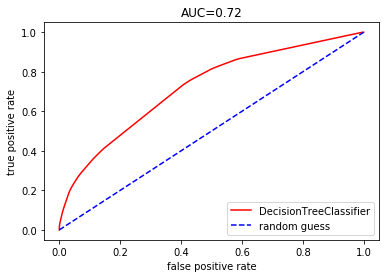

In [61]:
# AUC 그리기
plt.plot(fpr, tpr, "r-", label="DecisionTreeClassifier")
plt.plot([0, 1], [0, 1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right");

### 랜덤 포레스트 모델

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
# random_forest 설정
random_forest = RandomForestClassifier(n_estimators=100, criterion="gini",min_samples_split=30, n_jobs=-1)

In [64]:
grid_search = GridSearchCV(random_forest, parameters, n_jobs=-1, cv=3, scoring="roc_auc")

In [65]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=30,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random

In [66]:
grid_search.best_params_

{'max_depth': None}

In [67]:
random_forest_best = grid_search.best_estimator_

In [68]:
y_pred = random_forest_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
accuracy_score(y_test, y_pred)

0.85183

In [70]:
confusion_matrix(y_test, y_pred)

array([[81306,  1204],
       [13613,  3877]], dtype=int64)

In [72]:
y_pred_proba = random_forest_best.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.19433522, 0.13409169, 0.31321164, ..., 0.12275542, 0.16629697,
       0.04922416])

In [73]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

In [74]:
auc = roc_auc_score(y_test, y_pred_proba)

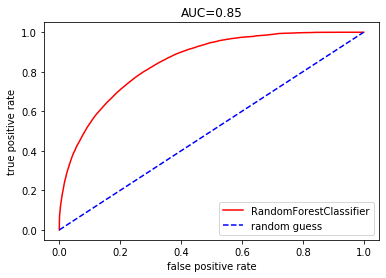

In [75]:
plt.plot(fpr, tpr, "r-", label="RandomForestClassifier")
plt.plot([0, 1], [0, 1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right");